<a href="https://colab.research.google.com/github/ckddudckddud/ckddud/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def entropy(p):
  q = 1-p
  ep = -(p*np.log2(p) + q*np.log2(q))
  return ep

In [ ]:
import numpy as np

In [ ]:
entropy(0.9)

0.4689955935892811

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
iris_data = load_iris()

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(iris_data.data,
                                                         iris_data.target)

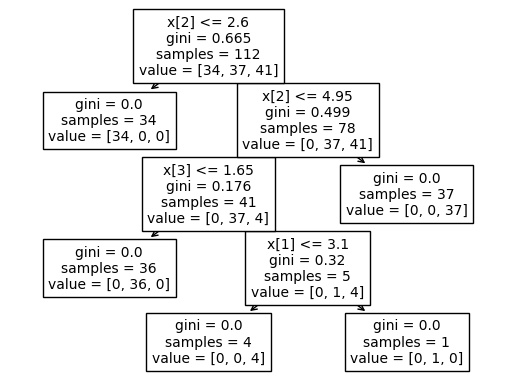

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
tree.plot_tree(dtc)
plt.show()

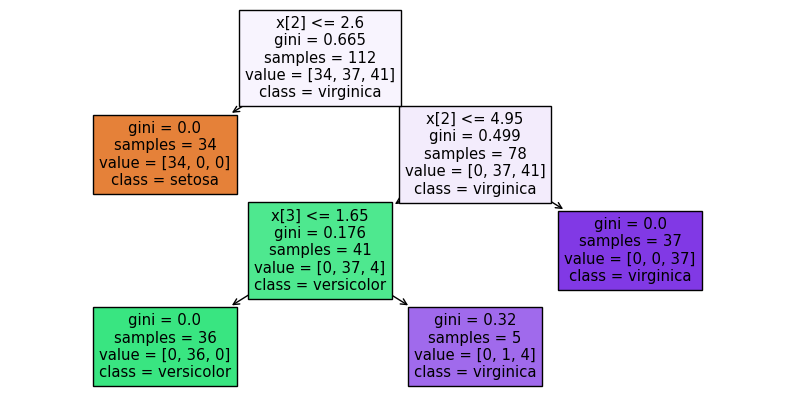

In [ ]:
plt.figure(figsize=(10,5))
tree.plot_tree(dtc,filled=True,
               class_names = iris_data.target_names)
plt.show()

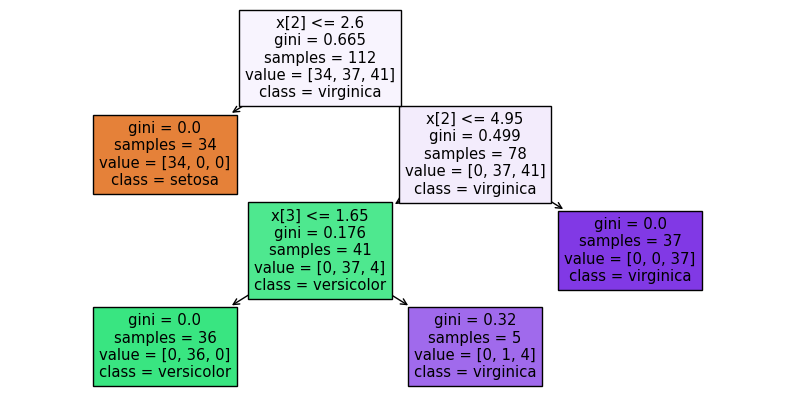

In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=4)
dtc.fit(x_train,y_train)
plt.figure(figsize=(10,5))
tree.plot_tree(dtc,filled=True,class_names=iris_data.target_names)
plt.show()

In [ ]:
def gini2(datas):
  total = 0
  for data in datas:
    total += data
  s = 0
  for data in datas:
    s += (data/total)**2
  return 1-s

In [ ]:
gini2([34,37,41])

0.6647002551020409

In [ ]:
dtc.feature_importances_

array([0.       , 0.       , 0.9228581, 0.0771419])

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
import pandas as pd
ss = pd.Series(iris_data.data[0])
rg = np.arange(ss.min(),ss.max(),0.3)
rg

array([0.2, 0.5, 0.8, 1.1, 1.4, 1.7, 2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8,
       4.1, 4.4, 4.7, 5. ])

In [ ]:
gvs = []
for i, r in enumerate(rg):
  print(i,"===\n",pd.Series(ss<r).value_counts())

0 ===
 False    4
dtype: int64
1 ===
 False    3
True     1
dtype: int64
2 ===
 False    3
True     1
dtype: int64
3 ===
 False    3
True     1
dtype: int64
4 ===
 False    3
True     1
dtype: int64
5 ===
 False    2
True     2
dtype: int64
6 ===
 False    2
True     2
dtype: int64
7 ===
 False    2
True     2
dtype: int64
8 ===
 False    2
True     2
dtype: int64
9 ===
 False    2
True     2
dtype: int64
10 ===
 False    2
True     2
dtype: int64
11 ===
 False    2
True     2
dtype: int64
12 ===
 True     3
False    1
dtype: int64
13 ===
 True     3
False    1
dtype: int64
14 ===
 True     3
False    1
dtype: int64
15 ===
 True     3
False    1
dtype: int64
16 ===
 True     3
False    1
dtype: int64


In [ ]:
iris = iris_data

In [ ]:
ss = pd.Series(iris.data[:,0])
rg = np.arange(ss.min(),ss.max(),0.3)
rg

array([4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9])

In [ ]:
import seaborn as sns

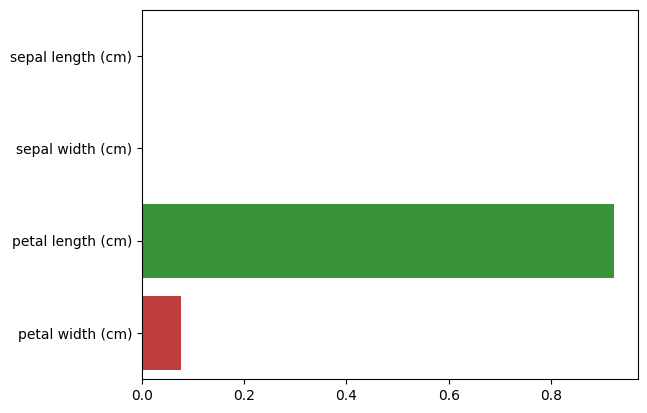

In [ ]:
sns.barplot(x=dtc.feature_importances_,
            y=iris.feature_names)
plt.show()

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x_features, y_labels = make_classification(n_features=2,
                                           n_redundant=0,
                                           n_informative=2,
                                           n_classes=3,
                                           n_clusters_per_class=1)
x_features.shape,y_labels.shape

((100, 2), (100,))

In [ ]:
df = pd.DataFrame(x_features)
df.describe()

,0,1
count,100.000000,100.000000
mean,0.253153,-0.330898
std,1.331571,1.046552
min,-2.985255,-1.927352
25%,-0.593898,-1.185348
50%,0.522333,-0.644370
75%,1.320056,0.683399
max,2.768165,1.667624


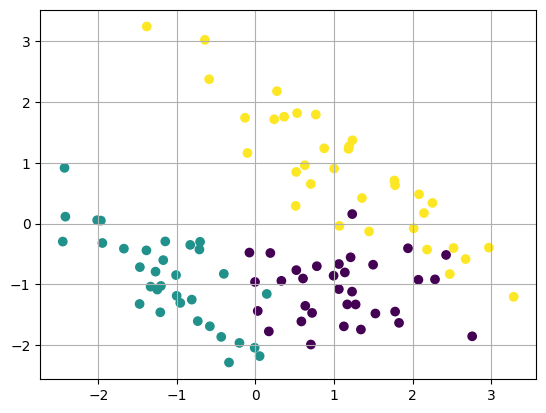

In [ ]:
plt.scatter(x_features[:,0],x_features[:,1],c=y_labels)
plt.grid()
plt.show()

In [ ]:
def visualize_boundary(model, x, y):
    fig,ax = plt.subplots()
    ax.scatter(x[:, 0], x[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    model.fit(x, y)

    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                                np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

<ipython-input-45-8953efa741b1>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


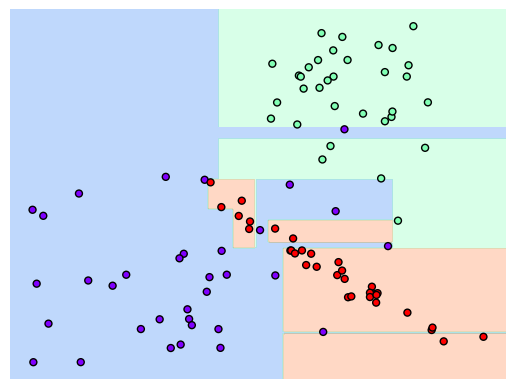

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_features, y_labels)
visualize_boundary(dtc,x_features, y_labels)

<ipython-input-45-8953efa741b1>:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


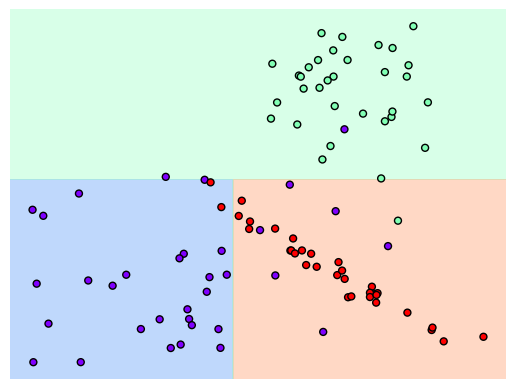

In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=6)
dtc.fit(x_features, y_labels)
visualize_boundary(dtc,x_features, y_labels)

In [ ]:
path = '/content/features.txt'

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators =[('LR',lr),('KNN',knn)],
                      voting='soft')

In [ ]:
vo.fit(x_train,y_train)
pred = vo.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("acc:",accuracy_score(y_test,pred))

acc: 0.9440559440559441


In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models = [lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))


LogisticRegression ===
acc: 0.9370629370629371
KNeighborsClassifier ===
acc: 0.9300699300699301


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
ss = StandardScaler()
ss.fit(cancer.data)
scaled_data = ss.transform(cancer.data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, cancer.target)

In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators =[('LR',lr),('KNN',knn)],
                      voting='soft')

In [ ]:
vo.fit(x_train, y_train)
pred = vo.predict(x_test)
print("acc:",accuracy_score(y_test,pred))

acc: 0.9790209790209791


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv(dir_path+'features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_dup_df = pd.DataFrame(data=df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
ndf = pd.merge(df.reset_index(), feature_dup_df, how='outer')
ndf['column_name'] = ndf[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] >0 else x[0] ,  axis=1)
ndf = ndf.drop(['index'], axis=1)
feature_name = ndf.iloc[:, 1].values.tolist()
x_train = pd.read_csv(dir_path+'train/X_train.txt',sep='\s+', names=feature_name )
x_test = pd.read_csv(dir_path+'test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv(dir_path+'train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(dir_path+'test/y_test.txt',sep='\s+',header=None,names=['action'])

NameError: ignored

In [ ]:
ss = StandardScaler()
ss.fit(x_train)
scaled_xtr = ss.transform(x_train)
scaled_xte = ss.transform(x_test)

In [ ]:
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[rf,lr,knn]
for model in models:
  model.fit(scaled_xtr,y_train)
  pred = model.predict(scaled_xte)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

RandomForestClassifier ===
acc: 0.9370629370629371
LogisticRegression ===
acc: 0.9790209790209791
KNeighborsClassifier ===
acc: 0.9790209790209791


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "max_depth":[4,8,12,16,20],
    "min_samples_leaf":[1,4,10,15],
    "min_samples_split":[2,4,6,8]
}

In [ ]:
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=params)
gs.fit(x_train, y_train)
print("best:",gs.best_params_)
print("acc:",gs.best_score_)

best: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}
acc: 0.9648153214774282


In [3]:
import pandas as pd

In [1]:
dir_path = '/content/drive/MyDrive/UHD/'

In [4]:
df = pd.read_csv(dir_path+'features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_dup_df = pd.DataFrame(data=df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
ndf = pd.merge(df.reset_index(), feature_dup_df, how='outer')
ndf['column_name'] = ndf[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] >0 else x[0] ,  axis=1)
ndf = ndf.drop(['index'], axis=1)
feature_name = ndf.iloc[:, 1].values.tolist()
x_train = pd.read_csv(dir_path+'train/X_train.txt',sep='\s+', names=feature_name )
x_test = pd.read_csv(dir_path+'test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv(dir_path+'train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(dir_path+'test/y_test.txt',sep='\s+',header=None,names=['action'])

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
import time

In [7]:
gbs = GradientBoostingClassifier()
st = time.time()
gbs.fit(x_train, y_train)
et = time.time()
print("소요 시간:",et-st)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


소요 시간: 992.2949960231781


In [10]:
pred = gbs.predict(x_test)
print("acc:",accuracy_score(pred,y_test))

acc: 0.9385816084153377


In [13]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [14]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target

In [15]:
df = pd.DataFrame(data,
                  columns=cancer.feature_names)
df ['target'] = label
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [16]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data,label)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train)

In [18]:
y_tr.shape, y_val.shape, y_test.shape

((319,), (107,), (143,))

In [20]:
dtr = xgb.DMatrix(data=x_tr,label=y_tr)
dval = xgb.DMatrix(data=x_val,label=y_val)
dtest = xgb.DMatrix(data=x_test,label=y_test)

In [21]:
params = {
    'max_depth':3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds = 400

In [22]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params=params,
                      dtrain = dtr,
                      num_boost_round = num_rounds,
                      early_stopping_rounds=50,
                      evals = eval_list)

[0]	train-logloss:0.65127	eval-logloss:0.65580
[1]	train-logloss:0.61314	eval-logloss:0.61966
[2]	train-logloss:0.57835	eval-logloss:0.58614
[3]	train-logloss:0.54648	eval-logloss:0.55572
[4]	train-logloss:0.51720	eval-logloss:0.52837
[5]	train-logloss:0.49031	eval-logloss:0.50395
[6]	train-logloss:0.46535	eval-logloss:0.48025
[7]	train-logloss:0.44243	eval-logloss:0.46063
[8]	train-logloss:0.42104	eval-logloss:0.44136
[9]	train-logloss:0.40100	eval-logloss:0.42264
[10]	train-logloss:0.38233	eval-logloss:0.40492
[11]	train-logloss:0.36387	eval-logloss:0.38662
[12]	train-logloss:0.34718	eval-logloss:0.36963
[13]	train-logloss:0.33105	eval-logloss:0.35391
[14]	train-logloss:0.31597	eval-logloss:0.33909
[15]	train-logloss:0.30258	eval-logloss:0.32808
[16]	train-logloss:0.28925	eval-logloss:0.31524
[17]	train-logloss:0.27721	eval-logloss:0.30298
[18]	train-logloss:0.26571	eval-logloss:0.29227
[19]	train-logloss:0.25462	eval-logloss:0.28171
[20]	train-logloss:0.24427	eval-logloss:0.27269
[2

In [27]:
pred_proba = xgb_model.predict(dtest)
pred= [1 if re>0.5 else 0 for re in pred_proba]
print(pred)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [29]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[44  3]
 [ 3 93]]
정확도: 0.9580, 정밀도: 0.9688, 재현율: 0.9688,    F1: 0.9688, AUC:0.9960


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [31]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models = [lr,knn]
for model in models:
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  pred_proba = model.predict_proba(x_test)[:,1]
  print(model.__class__.__name__)
  get_clf_eval(y_test,pred,pred_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
오차 행렬
[[44  3]
 [ 2 94]]
정확도: 0.9650, 정밀도: 0.9691, 재현율: 0.9792,    F1: 0.9741, AUC:0.9925
KNeighborsClassifier
오차 행렬
[[42  5]
 [ 5 91]]
정확도: 0.9301, 정밀도: 0.9479, 재현율: 0.9479,    F1: 0.9479, AUC:0.9621


In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)

In [33]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models = [lr,knn]
for model in models:
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  pred_proba = model.predict_proba(x_test)[:,1]
  print(model.__class__.__name__)
  get_clf_eval(y_test,pred,pred_proba)

LogisticRegression
오차 행렬
[[52  2]
 [ 2 87]]
정확도: 0.9720, 정밀도: 0.9775, 재현율: 0.9775,    F1: 0.9775, AUC:0.9965
KNeighborsClassifier
오차 행렬
[[49  5]
 [ 1 88]]
정확도: 0.9580, 정밀도: 0.9462, 재현율: 0.9888,    F1: 0.9670, AUC:0.9919


In [34]:
xgb_model.get_score()

{'f1': 93.0,
 'f4': 39.0,
 'f5': 37.0,
 'f6': 2.0,
 'f7': 43.0,
 'f8': 6.0,
 'f9': 13.0,
 'f10': 29.0,
 'f11': 3.0,
 'f12': 8.0,
 'f13': 117.0,
 'f14': 6.0,
 'f15': 67.0,
 'f16': 8.0,
 'f17': 44.0,
 'f18': 25.0,
 'f19': 12.0,
 'f20': 47.0,
 'f21': 88.0,
 'f22': 67.0,
 'f23': 44.0,
 'f24': 51.0,
 'f25': 2.0,
 'f26': 43.0,
 'f27': 89.0,
 'f28': 59.0,
 'f29': 6.0}

In [35]:
from xgboost import XGBClassifier

In [36]:
model = XGBClassifier()

In [37]:
model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:, 1]
get_clf_eval(y_test,pred,pred_proba)


오차 행렬
[[50  4]
 [ 0 89]]
정확도: 0.9720, 정밀도: 0.9570, 재현율: 1.0000,    F1: 0.9780, AUC:0.9948


In [40]:
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(x_tr, y_tr), (x_val, y_val)]
lgbm.fit(x_tr, y_tr,
                 early_stopping_rounds=50,
                 eval_metric="logloss",
                 eval_set=evals)
preds = lgbm.predict(x_test)
pred_proba = lgbm.predict_proba(x_test)[:, 1]



/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.6294	valid_1's binary_logloss: 0.622919
[2]	training's binary_logloss: 0.593397	valid_1's binary_logloss: 0.588135
[3]	training's binary_logloss: 0.560913	valid_1's binary_logloss: 0.556353
[4]	training's binary_logloss: 0.531443	valid_1's binary_logloss: 0.527408
[5]	training's binary_logloss: 0.504587	valid_1's binary_logloss: 0.501173
[6]	training's binary_logloss: 0.480013	valid_1's binary_logloss: 0.477479
[7]	training's binary_logloss: 0.457455	valid_1's binary_logloss: 0.45571
[8]	training's binary_logloss: 0.436537	valid_1's binary_logloss: 0.436602
[9]	training's binary_logloss: 0.417172	valid_1's binary_logloss: 0.418514
[10]	training's binary_logloss: 0.39801	valid_1's binary_logloss: 0.401821
[11]	training's binary_logloss: 0.381315	valid_1's binary_logloss: 0.38673
[12]	training's binary_logloss: 0.364539	valid_1's binary_logloss: 0.371904
[13]	training's binary_logloss: 0.349077	valid_1's binary_logloss: 0.358701
[14]	training's binary_log

In [39]:
import lightgbm
from lightgbm import LGBMClassifier

In [41]:
get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[50  4]
 [ 0 89]]
정확도: 0.9720, 정밀도: 0.9570, 재현율: 1.0000,    F1: 0.9780, AUC:0.9603


In [42]:
from hyperopt import hp
from hyperopt import fmin, tpe, Trials

In [43]:
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1) }

In [44]:
search_space

{'x': <hyperopt.pyll.base.Apply at 0x7f77a7557eb0>,
 'y': <hyperopt.pyll.base.Apply at 0x7f77a61c3c10>}

In [45]:
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

In [47]:
trial_val = Trials()
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=500,trials=trial_val)
print('best:', best_01)

100%|██████████| 500/500 [00:15<00:00, 31.25trial/s, best loss: -300.0]
best: {'x': 0.0, 'y': 15.0}


In [48]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target
ss = StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)

In [49]:
xgb_space = {
    'max_depth':hp.quniform('max_depth',5,20,1),
    'min_child_weight':hp.quniform('min_child_weight',1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree':hp.uniform('colsample_bytree',0.5,1)
}


In [53]:
from sklearn.model_selection import cross_val_score
import numpy as np
from hyperopt import STATUS_OK

In [54]:
from hyperopt.base import STATUS_OK
def objective_func(space):
  model = XGBClassifier(n_estimators=100,
                        max_depth=int(space['max_depth']),
                        min_child_weight = int(space['min_child_weight']),
                        learning_rate = space['learning_rate'],
                        colsample_bytree = space['colsample_bytree'],
                        eval_metric = 'loglss')
  acc = cross_val_score(model,x_train,y_train,
                  scoring='accuracy',
                  cv=3)
  return {'loss':-1*np.mean(acc),'staus':STATUS_OK}